# Word2Vec

## 1. Objetivos
* Realizar un modelo word2vec con un archivo txt.

## 2. Introducción

La incrustación de palabras es una técnica de modelado lingüístico que se utiliza para asignar palabras a vectores de números reales. Representa palabras o frases en un espacio vectorial de varias dimensiones. Las incrustaciones de palabras pueden generarse mediante diversos métodos, como redes neuronales, matrices de co-ocurrencia, modelos probabilísticos, etc. Word2Vec consta de modelos para generar incrustaciones de palabras. Estos modelos son redes neuronales superficiales de dos capas que tienen una capa de entrada, una capa oculta y una capa de salida. Word2Vec utiliza dos arquitecturas:

* CBOW (Bolsa continua de palabras): El modelo CBOW predice la palabra actual dadas las palabras de contexto dentro de una ventana específica. La capa de entrada contiene las palabras del contexto y la capa de salida contiene la palabra actual. La capa oculta contiene el número de dimensiones en las que queremos representar la palabra actual presente en la capa de salida.

* Omitir gramática : El salto gramatical predice las palabras del contexto circundante dentro de una ventana específica dada la palabra actual. La capa de entrada contiene la palabra actual y la capa de salida contiene las palabras contextuales. La capa oculta contiene el número de dimensiones en las que queremos representar la palabra actual presente en la capa de entrada.

The basic idea of word embedding is words that occur in similar context tend to be closer to each other in vector space [1].

## 3. Desarrollo

Importar Librerias

In [1]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from unidecode import unidecode
from nltk.tokenize import TweetTokenizer
from string import punctuation
from nltk.corpus import stopwords

In [3]:
stop_words = [unidecode(stopW) for stopW in stopwords.words('spanish')]
non_words = list(punctuation)
non_words.extend(['¿', '¡', 'q', 'd', 'x', 'xq', '...', '..'])
stop_words = stop_words + non_words

In [4]:
import pandas as pd

In [5]:
# Carga del documento
data = pd.read_excel('4_articles.xlsx')

In [6]:
data.head()

,Unnamed: 0,text_y
0,0,\n bienvenidos a la segunda edición...
1,1,"familiares y amigos de pedro aguilar, quien su..."
2,2,los asaltantes llegaron con armas de fuego has...
3,3,"según cnn en español, una encuesta de 2021 rev..."
4,4,durante la filmación dos actores fallecieron t...


In [7]:
data = data['text_y']

In [8]:
data.shape

(8992,)

In [9]:
data.head()

0    \n            bienvenidos a la segunda edición...
1    familiares y amigos de pedro aguilar, quien su...
2    los asaltantes llegaron con armas de fuego has...
3    según cnn en español, una encuesta de 2021 rev...
4    durante la filmación dos actores fallecieron t...
Name: text_y, dtype: object

In [10]:
# Preprocesamiento de datos

tknzr = TweetTokenizer()

clean_sentences = []

for dirty_sent in data:
    tokens = [token.lower() for token in tknzr.tokenize(unidecode(dirty_sent))
              if token.lower() not in stop_words]
    processed_sentence = ' '.join(tokens)  #put the list of clean extracted words of the sentence into ONE string
    clean_sentences.append(processed_sentence)  #save the clean prepocessed sentence in the new list

In [11]:
len(clean_sentences)

8992

In [12]:
clean_sentences[0:3]

['bienvenidos segunda edicion apuesta ecuador iniciativa invita volar alto pyme emprendimiento disfrutar retroalimentacion coaches inscribete recibe reconocimientos potenciar negocio presentan avalado auspician ejecutiva 10 anos experiencia enfocada rol sector privado desarrollo economico social paises inicio carrera laboratorio innovacion banco interamericano desarrollo bid rol dentro bid apoyo supervision 25 proyectos diferentes monto 15 millones dolares prestamos asistencias tecnicas especialmente dedicadas fortalecimiento crecimiento pymes ecuador posteriormente trabajo londres mobile for development fundacion gsma dedicado estimular innovacion digital traves proyectos sectores desatendidos participacion gsma manejo fondos publicos oportunidad implementar proyectos paises peru benin ruanda kenia espana reino unido actualmente desempena gerente proyecto pyme mastercard ecuador area enfocada diseno soluciones beneficios micro pequena medianas empresas region espera apoyar camino digi

Crear archivo txt

In [13]:
file_path = 'articles.txt'
with open(file_path, 'w') as file:
    for sentence in clean_sentences:
        file.write(sentence + '\n')

print(f"El array se ha guardado en {file_path}")

El array se ha guardado en articles.txt


Carga del documento txt

In [14]:
with open('articles.txt', 'r', encoding='utf-8') as file:
    documento = file.read()

In [15]:
len(documento)

14236913

Procesamiento de datos

El objetivo del preprocesamiento es converir el documento en una lista de frases, y cada frase es una lista de palabras

In [16]:
# Dividir el documento en frases usando '\n' como separador
oraciones = documento.split('\n')
len(oraciones)

8993

In [17]:
oraciones[0:3]

['bienvenidos segunda edicion apuesta ecuador iniciativa invita volar alto pyme emprendimiento disfrutar retroalimentacion coaches inscribete recibe reconocimientos potenciar negocio presentan avalado auspician ejecutiva 10 anos experiencia enfocada rol sector privado desarrollo economico social paises inicio carrera laboratorio innovacion banco interamericano desarrollo bid rol dentro bid apoyo supervision 25 proyectos diferentes monto 15 millones dolares prestamos asistencias tecnicas especialmente dedicadas fortalecimiento crecimiento pymes ecuador posteriormente trabajo londres mobile for development fundacion gsma dedicado estimular innovacion digital traves proyectos sectores desatendidos participacion gsma manejo fondos publicos oportunidad implementar proyectos paises peru benin ruanda kenia espana reino unido actualmente desempena gerente proyecto pyme mastercard ecuador area enfocada diseno soluciones beneficios micro pequena medianas empresas region espera apoyar camino digi

In [18]:
import string

oraciones_limpias = []
for oracion in oraciones:
    # Dividir por espacios
    tokens = oracion.translate(str.maketrans('', '', string.punctuation)).split()
    # Convertir a minusculas
    tokens = [word.lower() for word in tokens if word.isalpha()]
    if tokens:  # Agregar solo si hay tokens
        oraciones_limpias.append(tokens)

In [19]:
oraciones_limpias[0]

['bienvenidos',
 'segunda',
 'edicion',
 'apuesta',
 'ecuador',
 'iniciativa',
 'invita',
 'volar',
 'alto',
 'pyme',
 'emprendimiento',
 'disfrutar',
 'retroalimentacion',
 'coaches',
 'inscribete',
 'recibe',
 'reconocimientos',
 'potenciar',
 'negocio',
 'presentan',
 'avalado',
 'auspician',
 'ejecutiva',
 'anos',
 'experiencia',
 'enfocada',
 'rol',
 'sector',
 'privado',
 'desarrollo',
 'economico',
 'social',
 'paises',
 'inicio',
 'carrera',
 'laboratorio',
 'innovacion',
 'banco',
 'interamericano',
 'desarrollo',
 'bid',
 'rol',
 'dentro',
 'bid',
 'apoyo',
 'supervision',
 'proyectos',
 'diferentes',
 'monto',
 'millones',
 'dolares',
 'prestamos',
 'asistencias',
 'tecnicas',
 'especialmente',
 'dedicadas',
 'fortalecimiento',
 'crecimiento',
 'pymes',
 'ecuador',
 'posteriormente',
 'trabajo',
 'londres',
 'mobile',
 'for',
 'development',
 'fundacion',
 'gsma',
 'dedicado',
 'estimular',
 'innovacion',
 'digital',
 'traves',
 'proyectos',
 'sectores',
 'desatendidos',
 'p

Entrenamiento del modelo Word2Vec

In [20]:
import gensim
from gensim.models import Word2Vec

model = Word2Vec(sentences=oraciones_limpias, vector_size=300, window=5, min_count=1, workers=2)

Guardar el Modelo

In [21]:
model.wv.save_word2vec_format('noticias_emb.bin', binary=True)

Rendimiento del modelo

In [22]:
vector = model.wv['ecuador']
print(vector)

[ 0.56577224  0.24580954  0.6058785  -0.34278432 -1.1823518  -0.6560753
  0.80686903  0.528419    0.01614326  0.4338605   0.22180404 -0.9236564
 -0.89271516  0.30682576 -0.77035666  0.68374085 -0.24789856  1.3749753
 -0.5496127  -0.793276    0.62428683  0.56469595  1.4290577  -0.27765948
 -0.95003724  0.4122731   0.07914828 -1.0459045  -0.3200105  -0.03261403
  0.01156869 -0.42926595 -0.05666877 -0.97143483 -0.8479405   0.17177851
  0.8662544  -2.022222    2.2412438  -0.5387943  -0.6197062   0.919063
 -1.0344826  -0.89382094 -0.15099677  1.2524313  -0.11809743  1.5041422
  0.46017092  1.074729    1.1759868   0.9706393   0.02923678  0.6257065
 -0.01658825  0.34128007  0.06233167 -0.68229175  0.08546633  0.41806576
 -0.11096312 -0.3832779   0.73793185 -0.24999882 -0.82630634  0.25782374
 -0.43595144  0.8923814  -0.192244    0.69212025  0.11971151  1.0693729
 -0.6127293  -0.84511214  0.99979097  0.84178305  0.3984091  -0.25761816
  0.9086061   0.49412882  1.0384231   0.6046149  -0.5232392

In [23]:
palabras_cercanas = model.wv.most_similar("ecuador", topn=10)
palabras_cercanas

[('pais', 0.7347294092178345),
 ('unidos', 0.7018400430679321),
 ('peru', 0.6805263757705688),
 ('escandinavia', 0.6782144904136658),
 ('europa', 0.6648626923561096),
 ('establishment', 0.6483718752861023),
 ('relacionadas', 0.6430103778839111),
 ('copaban', 0.636596143245697),
 ('rompedores', 0.6261861324310303),
 ('httpswwwelcomerciocomultimahora', 0.6221025586128235)]

In [24]:
palabras_cercanas = model.wv.most_similar("emelec", topn=10)
palabras_cercanas

[('barcelona', 0.9859930276870728),
 ('aucas', 0.9766380190849304),
 ('sc', 0.9740095734596252),
 ('delfin', 0.9571717381477356),
 ('idolo', 0.9531016945838928),
 ('cuadro', 0.949869692325592),
 ('fc', 0.9463430643081665),
 ('cotejo', 0.9452903866767883),
 ('elenco', 0.9429147243499756),
 ('manchester', 0.9389315843582153)]

In [25]:
palabras_cercanas = model.wv.most_similar("ambato", topn=10)
palabras_cercanas

[('riobamba', 0.9650902152061462),
 ('pascuales', 0.9555467963218689),
 ('machala', 0.9548144936561584),
 ('loja', 0.9480268359184265),
 ('ubicada', 0.9452537894248962),
 ('bellavista', 0.9448482394218445),
 ('portoviejo', 0.9434457421302795),
 ('jipijapa', 0.9421283006668091),
 ('suburbio', 0.9400893449783325),
 ('monte', 0.9396555423736572)]

In [26]:
palabras_cercanas = model.wv.most_similar("correa", topn=10)
palabras_cercanas

[('expresidente', 0.9691561460494995),
 ('rafael', 0.9644551873207092),
 ('luque', 0.9547069668769836),
 ('lenin', 0.947096049785614),
 ('presidido', 0.9379538893699646),
 ('emplazo', 0.9359965920448303),
 ('asesor', 0.9328013062477112),
 ('legislador', 0.9326464533805847),
 ('lecaro', 0.9256418943405151),
 ('exfuncionario', 0.9247221946716309)]

In [27]:
palabras_cercanas = model.wv.most_similar("presidente", topn=10)
palabras_cercanas

[('volodimir', 0.9004852175712585),
 ('republica', 0.8985166549682617),
 ('lasso', 0.8951858282089233),
 ('leonidas', 0.8896188735961914),
 ('iza', 0.8861362338066101),
 ('vladimir', 0.8847513198852539),
 ('izquierdista', 0.8835869431495667),
 ('biden', 0.8834946751594543),
 ('petro', 0.8794867396354675),
 ('guillermo', 0.877174437046051)]

In [28]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [29]:
## Next you have some necessary steps part of the transformation of 300dim to 2D in order to plot
pca = PCA(n_components=2)

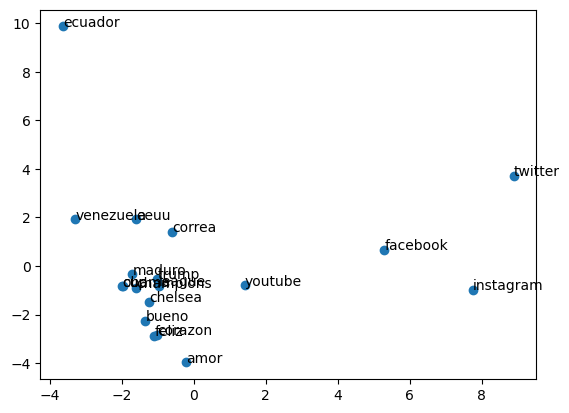

In [30]:
# you can think of a group of words that make sense to be together/far away to view in the plot
toplot_words = ['amor', 'bueno', 'feliz', 'corazon',  #words about positive feelings 
                'champions', 'league', 'chelsea', 'cup',  #futbal-related terms
                'facebook', 'youtube', 'instagram', 'twitter',  #media-related words
                'obama', 'trump', 'eeuu', 'maduro', 'correa', 'ecuador', 'venezuela'  #politics-related words
                ]

toplot_vecs = [model.wv[w] for w in toplot_words]  #getting the vectors for the specific words in toplot_words
result = pca.fit_transform(toplot_vecs)  #call to pca for transformation

# finally plotting...
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(toplot_words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Analogías

In [31]:
similar_words = model.wv.most_similar(positive=['correa', 'venezuela'], negative=['ecuador'], topn=10)
similar_words

[('rafael', 0.8691264986991882),
 ('canciller', 0.8506040573120117),
 ('lenin', 0.8491923809051514),
 ('moreno', 0.8440887331962585),
 ('expresidente', 0.8394977450370789),
 ('rosero', 0.8347668051719666),
 ('luque', 0.833598792552948),
 ('excandidato', 0.8301326036453247),
 ('larrea', 0.829746425151825),
 ('quiroz', 0.8289150595664978)]

In [32]:
similar_words = model.wv.most_similar(positive=['ambato', 'quito'], negative=['feliz'], topn=10)
similar_words

[('distrito', 0.808272659778595),
 ('coopno', 0.7804205417633057),
 ('caraveli', 0.7731323838233948),
 ('guayaquil', 0.7708156704902649),
 ('bienestaranimalgye', 0.7693125009536743),
 ('cuenc', 0.7560774683952332),
 ('extranjeria', 0.7494398355484009),
 ('antisobornos', 0.7480509281158447),
 ('illinizas', 0.7434638142585754),
 ('limino', 0.7425429224967957)]

In [40]:
similar_words = model.wv.most_similar(positive=['avion', 'barco'], negative=['despegue'], topn=10)
similar_words

[('lanzaron', 0.9441190958023071),
 ('intentaba', 0.940937876701355),
 ('cruce', 0.9356849789619446),
 ('ataco', 0.9314771890640259),
 ('cuadra', 0.929954469203949),
 ('mezquita', 0.9271810054779053),
 ('permanecido', 0.9262248873710632),
 ('coche', 0.9261677861213684),
 ('ladera', 0.9241077899932861),
 ('arribaron', 0.9237600564956665)]

In [39]:
similar_words = model.wv.most_similar(positive=['emprendimiento', 'educacion'], negative=['negocios'], topn=10)
similar_words

[('caces', 0.8362231850624084),
 ('diplomado', 0.8354101777076721),
 ('adscrito', 0.8312475681304932),
 ('prepagada', 0.8307017087936401),
 ('ciencia', 0.8291858434677124),
 ('inspi', 0.8286521434783936),
 ('pedagogia', 0.8263671398162842),
 ('viceministra', 0.823488175868988),
 ('intercultural', 0.8164026141166687),
 ('mtt', 0.8157991766929626)]

In [38]:
similar_words = model.wv.most_similar(positive=['hospital', 'escuela'], negative=['salud'], topn=10)
similar_words

[('cerro', 0.8394054174423218),
 ('casitagua', 0.8322449922561646),
 ('turupamba', 0.8138219714164734),
 ('monteolivo', 0.8127524256706238),
 ('enterrarla', 0.7955969572067261),
 ('cenepa', 0.7950347661972046),
 ('frondoso', 0.7898752093315125),
 ('ruperto', 0.7825239896774292),
 ('enriquez', 0.781564474105835),
 ('unemi', 0.7812885046005249)]

In [37]:
similar_words = model.wv.most_similar(positive=['ladron', 'estudiante'], negative=['robo'], topn=10)
similar_words

[('organizacional', 0.9404217004776001),
 ('desempena', 0.9375580549240112),
 ('ingeniera', 0.9362909197807312),
 ('monzon', 0.9346729516983032),
 ('guevara', 0.9330515265464783),
 ('doctora', 0.93291836977005),
 ('dr', 0.9321550130844116),
 ('arquitecto', 0.9321464896202087),
 ('pianista', 0.9308106899261475),
 ('ceo', 0.9302084445953369)]

In [41]:
similar_words = model.wv.most_similar(positive=['forcejeo', 'lluvia'], negative=['resistencia'], topn=10)
similar_words

[('transitaba', 0.8932178020477295),
 ('cabezal', 0.8848901987075806),
 ('deslizamiento', 0.8803356885910034),
 ('trailer', 0.8765203952789307),
 ('atrapados', 0.875813364982605),
 ('detergentes', 0.8724955320358276),
 ('bus', 0.8666867613792419),
 ('circulaban', 0.8627653121948242),
 ('provoco', 0.8590365648269653),
 ('movieron', 0.8585566282272339)]

In [42]:
similar_words = model.wv.most_similar(positive=['ciudad', 'joyeria'], negative=['pais'], topn=10)
similar_words

[('pambachupa', 0.890112042427063),
 ('losas', 0.8883123397827148),
 ('duranboliche', 0.8881904482841492),
 ('circulaba', 0.8829360604286194),
 ('residencial', 0.876883327960968),
 ('tumbaco', 0.8763194680213928),
 ('gasolinera', 0.8746213912963867),
 ('afueras', 0.8742498755455017),
 ('parqueadero', 0.8733379244804382),
 ('transitaba', 0.8725453019142151)]

In [43]:
similar_words = model.wv.most_similar(positive=['cliente', 'pasajero'], negative=['compra'], topn=10)
similar_words

[('confesado', 0.936333954334259),
 ('femicida', 0.9259151816368103),
 ('casquete', 0.9210560917854309),
 ('lilian', 0.9140572547912598),
 ('taxista', 0.9125774502754211),
 ('greymez', 0.9096716046333313),
 ('padrastro', 0.9076263904571533),
 ('asesino', 0.9064092040061951),
 ('cometio', 0.9025260806083679),
 ('sujeto', 0.900671124458313)]

In [44]:
similar_words = model.wv.most_similar(positive=['emocion', 'angustiado'], negative=['feliz'], topn=10)
similar_words

[('deleg', 0.914764404296875),
 ('lujo', 0.9147244691848755),
 ('bisht', 0.9103283286094666),
 ('organizaran', 0.909254789352417),
 ('brindis', 0.9084954261779785),
 ('tipica', 0.9084915518760681),
 ('representativas', 0.9066532850265503),
 ('funk', 0.906523585319519),
 ('disfrutan', 0.9058809876441956),
 ('exclusivos', 0.9054269194602966)]

Calcular la similitud coseno entre vectores de palabras

In [45]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('obama', 'maduro')
sim2 = model.wv.similarity('obama', 'trump')
sim3 = model.wv.similarity('obama', 'shakira')

print('Similarity between "obama" and "maduro":', sim1)
print('Similarity between "obama" and "trump":', sim2)
print('Similarity between "obama" and "shakira":', sim3)

Similarity between "obama" and "maduro": 0.9289897
Similarity between "obama" and "trump": 0.9304854
Similarity between "obama" and "shakira": 0.6065737


In [46]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('universidad', 'ciencia')
sim2 = model.wv.similarity('universidad', 'investigacion')
sim3 = model.wv.similarity('universidad', 'futbol')

print('Similarity between "universidad" and "ciencia":', sim1)
print('Similarity between "universidad" and "investigacion":', sim2)
print('Similarity between "universidad" and "futbol":', sim3)


Similarity between "universidad" and "ciencia": 0.65495145
Similarity between "universidad" and "investigacion": 0.31924576
Similarity between "universidad" and "futbol": 0.39939487


In [47]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('bienvenidos', 'segunda')
sim2 = model.wv.similarity('bienvenidos', 'edicion')
sim3 = model.wv.similarity('bienvenidos', 'pymes')

print('Similarity between "bienvenidos" and "segunda":', sim1)
print('Similarity between "bienvenidos" and "edicion":', sim2)
print('Similarity between "bienvenidos" and "pymes":', sim3)

Similarity between "bienvenidos" and "segunda": 0.48134685
Similarity between "bienvenidos" and "edicion": 0.64508104
Similarity between "bienvenidos" and "pymes": 0.9009172


In [48]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('emprendimiento', 'negocio')
sim2 = model.wv.similarity('emprendimiento', 'innovacion')
sim3 = model.wv.similarity('emprendimiento', 'desarrollo')

print('Similarity between "emprendimiento" and "negocio":', sim1)
print('Similarity between "emprendimiento" and "innovacion":', sim2)
print('Similarity between "emprendimiento" and "desarrollo":', sim3)


Similarity between "emprendimiento" and "negocio": 0.8843998
Similarity between "emprendimiento" and "innovacion": 0.85507286
Similarity between "emprendimiento" and "desarrollo": 0.69602656


In [49]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('coaches', 'retroalimentacion')
sim2 = model.wv.similarity('coaches', 'equipo')
sim3 = model.wv.similarity('coaches', 'entrenadores')

print('Similarity between "coaches" and "retroalimentacion":', sim1)
print('Similarity between "coaches" and "equipo":', sim2)
print('Similarity between "coaches" and "entrenadores":', sim3)

Similarity between "coaches" and "retroalimentacion": 0.88993645
Similarity between "coaches" and "equipo": 0.5358455
Similarity between "coaches" and "entrenadores": 0.8388332


In [50]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('proyectos', 'prestamos')
sim2 = model.wv.similarity('proyectos', 'asistencias')
sim3 = model.wv.similarity('proyectos', 'inversion')

print('Similarity between "proyectos" and "prestamos":', sim1)
print('Similarity between "proyectos" and "asistencias":', sim2)
print('Similarity between "proyectos" and "inversion":', sim3)

Similarity between "proyectos" and "prestamos": 0.7840743
Similarity between "proyectos" and "asistencias": 0.118475296
Similarity between "proyectos" and "inversion": 0.81647146


In [51]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('experiencia', 'conocimiento')
sim2 = model.wv.similarity('experiencia', 'habilidades')
sim3 = model.wv.similarity('experiencia', 'aprendizaje')

print('Similarity between "experiencia" and "conocimiento":', sim1)
print('Similarity between "experiencia" and "habilidades":', sim2)
print('Similarity between "experiencia" and "aprendizaje":', sim3)

Similarity between "experiencia" and "conocimiento": 0.52314246
Similarity between "experiencia" and "habilidades": 0.7304913
Similarity between "experiencia" and "aprendizaje": 0.78442013


In [53]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('innovacion', 'tecnologia')
sim2 = model.wv.similarity('innovacion', 'creatividad')
sim3 = model.wv.similarity('innovacion', 'nuevo')

print('Similarity between "innovacion" and "tecnologia":', sim1)
print('Similarity between "innovacion" and "creatividad":', sim2)
print('Similarity between "innovacion" and "nuevo":', sim3)

Similarity between "innovacion" and "tecnologia": 0.9486524
Similarity between "innovacion" and "creatividad": 0.71299016
Similarity between "innovacion" and "nuevo": 0.38986084


In [54]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('asaltantes', 'delincuentes')
sim2 = model.wv.similarity('asaltantes', 'crimen')
sim3 = model.wv.similarity('asaltantes', 'robo')

print('Similarity between "asaltantes" and "delincuentes":', sim1)
print('Similarity between "asaltantes" and "crimen":', sim2)
print('Similarity between "asaltantes" and "robo":', sim3)

Similarity between "asaltantes" and "delincuentes": 0.9014293
Similarity between "asaltantes" and "crimen": 0.5640826
Similarity between "asaltantes" and "robo": 0.8762963


In [56]:
# Calculate cosine similarity between word vectors
sim1 = model.wv.similarity('joyeria', 'dinero')
sim2 = model.wv.similarity('joyeria', 'diamantes')
sim3 = model.wv.similarity('joyeria', 'orfebreria')

print('Similarity between "joyeria" and "dinero":', sim1)
print('Similarity between "joyeria" and "diamantes":', sim2)
print('Similarity between "joyeria" and "orfebreria":', sim3)

Similarity between "joyeria" and "dinero": 0.42978433
Similarity between "joyeria" and "diamantes": 0.8594645
Similarity between "joyeria" and "orfebreria": 0.57009673


## 4. Conclusiones

En conclusión, el modelo Word2Vec emerge como una herramienta poderosa en el procesamiento del lenguaje natural al abordar el desafío de representar palabras en un espacio semántico significativo. A través de su capacidad para capturar relaciones contextuales y semánticas entre palabras, el modelo ha revolucionado la manera en que las máquinas interpretan y procesan el lenguaje humano. Al asignar vectores numéricos a palabras, el Word2Vec permite realizar cálculos de similitud y analogía, potenciando aplicaciones que van desde la búsqueda de información hasta la traducción automática. A pesar de sus limitaciones, este enfoque ofrece un avance significativo en la comprensión y el tratamiento del lenguaje, impulsando continuamente la innovación en el campo del procesamiento del lenguaje natural.

## 5. Referencias

\[1] SumedhKadam. "Python | Word Embedding using Word2Vec - GeeksforGeeks". [GeeksforGeeks.](https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/)

## 6. Anexos

Puedes acceder al repositorio aqui: [GitHub](https://github.com/vimofama/Word2Vec)